In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('tidyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Keep up to date with changes at https://www.tidyverse.org/blog/

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: tidyr

R[write to console]: Loading required package: reshape2

R[write to console]: 
Attaching package: ‘reshape2’


R[write to console]: The following object is masked from ‘package:tidyr’:

    smiths




In [4]:
df = pd.read_csv('combined_date.csv')
df.head()

,url,headline,datetime,organization,caa,fact_check_details
0,https://www.altnews.in/no-the-elderly-man-pelt...,"No, the elderly man pelting stone in Kanpur is...",2019-12-31,Alt News,No,NaN
1,https://www.altnews.in/caa-protest-video-of-ja...,CAA Protest: Video of Jabalpur police vandalis...,2019-12-31,Alt News,Yes,NaN
2,https://www.altnews.in/no-danish-kaneria-is-no...,"No, Danish Kaneria is not among Pakistani play...",2019-12-30,Alt News,No,NaN
3,https://www.altnews.in/video-from-sri-lanka-sh...,Video from Sri Lanka shared as Muslims beaten ...,2019-12-30,Alt News,No,NaN
4,https://www.altnews.in/caa-protests-old-video-...,CAA Protests: Old video from Pakistan shared a...,2019-12-30,Alt News,Yes,NaN


In [5]:
df.datetime = pd.to_datetime(df.datetime)

In [6]:
df_long = df[df.caa == 'Yes'].resample('M', on='datetime').organization.value_counts()
df_long = pd.DataFrame(df_long)
df_long = df_long.rename(columns={'organization': 'count'})
df_long = df_long.reset_index()
df_long['fb_partner'] = df_long.organization != 'Alt News'
df_long.to_csv('df_long.csv', index=False)
df_long

,datetime,organization,count,fb_partner
0,2019-12-31,Alt News,50,False
1,2019-12-31,Boomlive,14,True
2,2019-12-31,The Quint,13,True
3,2019-12-31,India Today,6,True
4,2019-12-31,Vishvas News,5,True
5,2019-12-31,AFP,1,True
6,2020-01-31,Alt News,48,False
7,2020-01-31,Boomlive,14,True
8,2020-01-31,The Quint,13,True
9,2020-01-31,India Today,5,True


In [7]:
# def label(fb_partner_boolean):
#     if fb_partner_boolean:
#         return('Facebook partner')
#     else:
#         return('Not Facebook partner')

In [8]:
df_long['fb_partner'] = df_long.fb_partner.apply(lambda x: 'Facebook Partner' if x else 'Not Partner')

In [9]:
# df_long['fb_partner'] = df_long.fb_partner.apply(label)
# df_long

In [10]:
# df_long['partner'] = df_long.fb_partner.apply(label)
df_long

,datetime,organization,count,fb_partner
0,2019-12-31,Alt News,50,Not Partner
1,2019-12-31,Boomlive,14,Facebook Partner
2,2019-12-31,The Quint,13,Facebook Partner
3,2019-12-31,India Today,6,Facebook Partner
4,2019-12-31,Vishvas News,5,Facebook Partner
5,2019-12-31,AFP,1,Facebook Partner
6,2020-01-31,Alt News,48,Not Partner
7,2020-01-31,Boomlive,14,Facebook Partner
8,2020-01-31,The Quint,13,Facebook Partner
9,2020-01-31,India Today,5,Facebook Partner


In [11]:
df_long['datetime_str'] = df_long.datetime.dt.strftime('%Y-%m-%d')
df_long['yearmonth_str'] = df_long.datetime.dt.strftime('%Y-%m')
df_long.head(2)

,datetime,organization,count,fb_partner,datetime_str,yearmonth_str
0,2019-12-31,Alt News,50,Not Partner,2019-12-31,2019-12
1,2019-12-31,Boomlive,14,Facebook Partner,2019-12-31,2019-12


In [12]:
df_long.to_csv('df_long.csv', index=False)

In [13]:
# df2 = pd.read_csv('df_long.csv')
# df2

Now we add the totals

In [14]:
# df.resample('M', on='datetime').value_counts()
df['yearmonth'] = df.datetime.dt.strftime('%Y-%m')+'-01'
df_long_2 = pd.DataFrame(df.groupby(['datetime','organization', 'caa','yearmonth']).headline.count())
df_long_2 = df_long_2.rename(columns={'headline': 'count'}).reset_index()
# df_long_2['fb_partner'] = df_long_2['organization'] != 'Alt News'
# df_long_2['partner'] = df_long_2.fb_partner.apply(label)
df_long_2.to_csv('df_long_2.csv', index=False)
df_long_2

,datetime,organization,caa,yearmonth,count
0,2019-12-01,Boomlive,No,2019-12-01,2
1,2019-12-01,India Today,No,2019-12-01,2
2,2019-12-02,Alt News,No,2019-12-01,5
3,2019-12-02,Boomlive,No,2019-12-01,1
4,2019-12-02,India Today,No,2019-12-01,2
...,...,...,...,...,...
520,2020-03-30,Boomlive,No,2020-03-01,2
521,2020-03-30,The Quint,No,2020-03-01,2
522,2020-03-31,Alt News,No,2020-03-01,5
523,2020-03-31,India Today,No,2020-03-01,1


In [15]:
!open .

Rows: 525 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): organization, caa
dbl  (1): count
date (2): datetime, yearmonth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


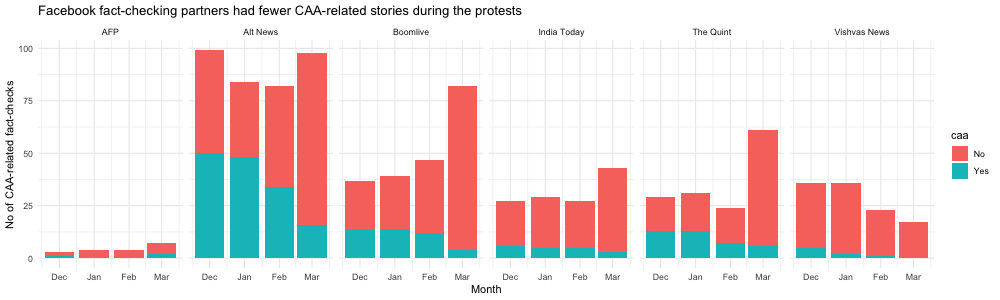

In [17]:
%%R -w 1000 -h 300 

# EXAMPLE R CELL
df <- read_csv('df_long_2.csv')
df$yearmonth <- as.Date(df$yearmonth, format="%Y-%m-%d")

plt <- ggplot(df, aes(x=yearmonth, y=count, fill=caa)) +
    geom_col() + 
    scale_x_date(date_labels = "%b") +
    facet_wrap(~organization, nrow=1) +
    theme_minimal() +
    labs(
        x='Month',
        y='No of CAA-related fact-checks',
        title='Facebook fact-checking partners had fewer CAA-related stories during the protests',
    )

plt